[ 9  7 31 19  8]
[ 7  8  7 42  7 11  7]
[ 7  8  8 50  8 11  7]
[ 8 11  9 49  6 11  7]
[ 8  9  8 65  9  9  8]
[ 9  9  9 65  7  9  8]
[ 9 11  8 61  7 10  8]
[10 11  9 62  8 11  9]
[11 12  9 64  8 13 10]
[ 8 14  9 64  9 14  8]
[ 8 13 11 62  9 14  8]
[10 17 11 66  8 16  9]
[10 19  9 63  8 16  9]
[10 16  8 63  9 17 10]
[ 8 14 11 63  9 18  8]


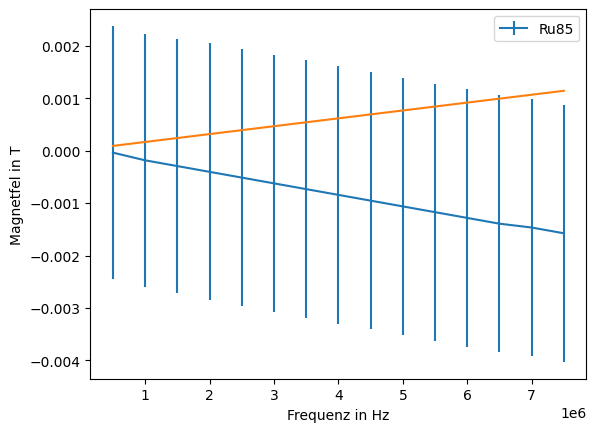

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import peak_widths
from matplotlib.gridspec import GridSpec
import csv

class LandeFaktor:
    def __init__(self,path):
        self.path = path
        self.file = open(self.path)
        self.file = csv.reader(self.file,delimiter='\t')
        self.time = []
        self.channel1 = []
        self.channel2 =[]
        for line in self.file:
            self.time.append(float(line[0]))
            self.channel1.append(float(line[1]))
            self.channel2.append(float(line[2]))
        self.time = np.array(self.time)
        self.time_phase = self.time 
        self.channel1 = np.array(self.channel1) 
        self.channel2= np.array(self.channel2)

    def findpeaksauto(self):
        peaks = find_peaks(-self.channel2,prominence=0.0019,distance=5)
        return peaks[0]
    
    def getpeakwidth(self):
        linien_breite = peak_widths(-self.channel2,self.findpeaksauto())
        print(linien_breite[0].astype(int))
        return self.get_b(linien_breite[0].astype(int))

    def give_current(self,peaks):
        widerstand = 1.745
        return self.channel1[peaks] / widerstand

    def get_b(self,peaks):
        current = self.give_current(peaks)
        mu0 = 1.256637061e-6
        N = 80
        r = 0.09
        B = mu0*(4/5)**(3/2) * N/r * current
        return B

    def plotwithpeaks(self,peaks,findpeaks = False):
        if findpeaks:
            peaks,_ = self.findpeaksauto()
        fig = plt.figure(figsize=(11,6))
        gs = GridSpec(8,5)
        fig1 = fig.add_subplot(gs[:,:])
        fig1.set_title(str(self.path)[31:], fontsize = 15)

        fig1.set_xlabel('Zeit in s',fontsize = 15)
        fig1.set_ylabel(r'Spannung $U_{HH}$ in V',color = 'r', fontsize = 15)
        fig1.tick_params(axis='y',labelcolor='r')
        fig1.plot(self.time_phase, self.channel1,'r-', label = 'Channel 1')
        fig1.grid(True)

        fig2 = fig1.twinx()
        fig2.set_ylabel(r'Spannung  $U_{RF}$ in V',color='g',fontsize=15)
        fig2.tick_params(axis='y',labelcolor = 'g')
        fig2.plot(self.time,self.channel2,'g',label='Channel 2')
        for peak in peaks:
            plt.plot(self.time[peak],self.channel2[peak],'bo')

lande2500 = LandeFaktor('230508_OptischesPumpen/Resonanz2500kHz')
#print(lande2500.getpeakwidth())
peaks = [988,1076,1423,1512]
#lande2500.plotwithpeaks(peaks,findpeaks=True)
#print(lande2500.get_b(lande2500.findpeaksauto()))

#'''
dateien = np.arange(500,8000,500)
Ru85 = []
Ru185 = []
yerrru85 =[]
yerrru185 =[]
yerrru87 =[]
yerrru187 =[]
Ru87 =[]
Ru187=[]
for datei in dateien:
    lande = LandeFaktor('230508_OptischesPumpen/Resonanz'+str(datei)+'kHz')
    b_peaks = lande.get_b(lande.findpeaksauto())
    Ru85.append(b_peaks[1])
    yerrru85.append(lande.getpeakwidth()[1])
    #yerrru85 = lande.get_b(yerrru85)
    Ru185.append(b_peaks[-2])
    #yerrru185.append(lande.getpeakwidth()[-2])
    Ru87.append(b_peaks[2])
    #yerrru87.append(lande.getpeakwidth()[2])
    Ru187.append(b_peaks[-3])
    #yerrru187.append(lande.getpeakwidth()[-3])
#print(yerrru85)
plt.errorbar(dateien*1000,Ru85,yerr=yerrru85,label='Ru85')
#plt.errorbar(dateien*1000,Ru87,yerr=yerrru185,label='Ru87')
#plt.errorbar(dateien*1000,Ru185,yerr=yerrru185,label='Ru85_1')
#plt.errorbar(dateien*1000,Ru187,yerr=yerrru187,label='Ru87_1')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Magnetfel in T')

fit,err = np.polyfit(dateien*1000,Ru187,deg=1,cov = True)
a = fit[0]
b=fit[1]
#print(a)
h = 6.626e-34
mub = 9.274e-24
#print(h/(mub*a))
yseq = a*dateien*1000+b
plt.plot(dateien*1000,yseq)
plt.legend()
#'''
#plt.xlim(0.475,0.525)


In [10]:
np.array([1,2,3,4])+0.01

array([1.01, 2.01, 3.01, 4.01])